# Data Import

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#sents_score : 시언 점수
#sieon_sent_score : 시언 서술어 점수

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/4-1창종설/machine/0507 df_for_holdout.csv')

In [ ]:
df.index = df['Date']
df.drop(['Date'], axis = 1, inplace = True)

In [ ]:
df.rename({'next_spi':'spi'}, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


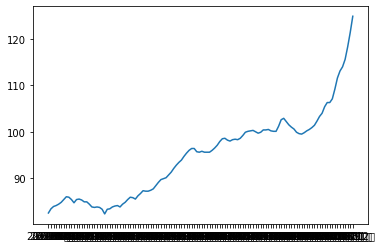

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df.index, list(df['spi']))

In [ ]:
train = df.iloc[:90]
test = df.iloc[90:]

# 훈련/테스트 분리(경우의 수)

## BASE

In [ ]:
train_base = train.drop(['시언감성점수','효준감성점수','시언서술포함감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)
test_base = test.drop(['시언감성점수','효준감성점수','시언서술포함감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)

In [ ]:
X_train_base = train_base.drop(['spi'], axis = 1)
y_train_base = list(train_base['spi'])
X_test_base = test_base.drop(['spi'], axis = 1)
y_test_base = list(test_base['spi'])

In [ ]:
#before gridsearch
#base
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_base, y_train_base) 
y_pred = regressor.predict(X_test_base)
RMSE = mean_squared_error(y_test_base, y_pred)**0.5
RMSE

9.449489428888068

In [ ]:
#gridsearch
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5]
}

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train_base, y_train_base)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
CV_rfc.best_params_

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
y_pred = CV_rfc.predict(X_test_base)
RMSE = mean_squared_error(y_test_base, y_pred)**0.5
RMSE
score_list=[]
score_list.append(('거시경제',RMSE))

## 효준 감성점수

In [ ]:
train_hyo = train.drop(['시언감성점수','시언서술포함감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)
test_hyo = test.drop(['시언감성점수','시언서술포함감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)

X_train_hyo = train_hyo.drop(['spi'], axis = 1)
y_train_hyo = list(train_hyo['spi'])
X_test_hyo = test_hyo.drop(['spi'], axis = 1)
y_test_hyo = list(test_hyo['spi'])

In [ ]:
#before gridsearch
#효준 감성점수
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_hyo, y_train_hyo) 
y_pred = regressor.predict(X_test_hyo)
RMSE = mean_squared_error(y_test_hyo, y_pred)**0.5
RMSE

9.404050481928904

In [ ]:
#gridsearch
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train_hyo, y_train_hyo)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [ ]:
CV_rfc.best_params_

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 20}

In [ ]:
y_pred = CV_rfc.predict(X_test_hyo)
RMSE = mean_squared_error(y_test_hyo, y_pred)**0.5
RMSE

score_list.append(('효준감성점수',RMSE))

## 시언 감성점수(sent_score)

In [ ]:
train_si = train.drop(['시언서술포함감성점수','효준감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)
test_si = test.drop(['효준감성점수','시언서술포함감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)

X_train_si = train_si.drop(['spi'], axis = 1)
y_train_si = list(train_si['spi'])
X_test_si = test_si.drop(['spi'], axis = 1)
y_test_si = list(test_si['spi'])

In [ ]:
#before gridsearch
#시언 감성점수
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_si, y_train_si) 
y_pred = regressor.predict(X_test_si)
RMSE = mean_squared_error(y_test_si, y_pred)**0.5
RMSE

9.440164281762648

In [ ]:
#gridsearch
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train_si, y_train_si)
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test_si)
RMSE = mean_squared_error(y_test_si, y_pred)**0.5

score_list.append(('시언감성점수',RMSE))

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 100}


## 시언 서술어(sieon_sent_score)

In [ ]:
train_sisent = train.drop(['시언감성점수','효준감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)
test_sisent = test.drop(['효준감성점수','시언감성점수','주택','아파트','분양','서울','가구','부동산','단지','시장'], axis = 1)

X_train_sisent = train_sisent.drop(['spi'], axis = 1)
y_train_sisent = list(train_sisent['spi'])
X_test_sisent = test_sisent.drop(['spi'], axis = 1)
y_test_sisent = list(test_sisent['spi'])

In [ ]:
#before gridsearch
#시언 서술어 감성점수
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_sisent, y_train_sisent) 
y_pred = regressor.predict(X_test_sisent)
RMSE = mean_squared_error(y_test_sisent, y_pred)**0.5
RMSE

9.477817276848816

In [ ]:
#gridsearch
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train_sisent, y_train_sisent)
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test_sisent)
RMSE = mean_squared_error(y_test_sisent, y_pred)**0.5

score_list.append(('시언감성점수(서술어)',RMSE))

{'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 20}


## 8개 변수

In [ ]:
train_8 = train.drop(['시언감성점수','효준감성점수','시언서술포함감성점수'], axis = 1)
test_8 = test.drop(['효준감성점수','시언감성점수','시언서술포함감성점수'], axis = 1)

X_train_8 = train_8.drop(['spi'], axis = 1)
y_train_8 = list(train_8['spi'])
X_test_8 = test_8.drop(['spi'], axis = 1)
y_test_8 = list(test_8['spi'])

In [ ]:
#before gridsearch
#8변수
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
regressor.fit(X_train_8, y_train_8) 
y_pred = regressor.predict(X_test_8)
RMSE = mean_squared_error(y_test_8, y_pred)**0.5
RMSE

9.549294778498925

In [ ]:
#gridsearch
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train_8, y_train_8)
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test_8)
RMSE = mean_squared_error(y_test_8, y_pred)**0.5

score_list.append(('TF-IDF',RMSE))

{'max_depth': 7, 'min_samples_split': 3, 'n_estimators': 20}


In [ ]:
pd.DataFrame(score_list, columns=['방법','RMSE'])

,방법,RMSE
0,거시경제,9.433499
1,효준감성점수,9.476330
2,시언감성점수,9.485230
3,시언감성점수(서술어),9.526200
4,TF-IDF,9.294673


# 다 넣기

In [ ]:
#before gridsearch
X_train_all = train.drop(['spi'], axis = 1)
y_train_all = list(train['spi'])
X_test_all = test.drop(['spi'], axis = 1)
y_test_all = list(test['spi'])

#gridsearch
rfc = RandomForestRegressor(random_state = 42)
param_grid = { 
    'n_estimators': [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200],
    'max_depth' : [2,3,4,5,6,7],
    'min_samples_split' : [2,3,4,5]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, refit = True, scoring = 'neg_mean_squared_error')
CV_rfc.fit(X_train_all, y_train_all)
print(CV_rfc.best_params_)
y_pred = CV_rfc.predict(X_test_all)
RMSE = mean_squared_error(y_test_all, y_pred)**0.5

score_list.append(('모든 변수 포함',RMSE))

{'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 20}


In [ ]:
pd.DataFrame(score_list, columns=['방법','RMSE'])

,방법,RMSE
0,거시경제,9.433499
1,효준감성점수,9.476330
2,시언감성점수,9.485230
3,시언감성점수(서술어),9.526200
4,TF-IDF,9.294673
5,모든 변수 포함,9.272751
